## <span style="color:#db7d60">Setup</span>

In [1]:
%load_ext autoreload
%autoreload 2

import json
import math
import pickle
import numpy as np
import pandas as pd
import textwrap
import sys
from pathlib import Path
from IPython.display import display, Markdown
import matplotlib.pyplot as plt

# pUtil needs to be loaded from the root directory
parent_dir = Path().resolve().parent
sys.path.insert(0, str(parent_dir))

import pUtil
from analysis_common import *

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.expand_frame_repr', False)

## <span style="color:#db7d60">Analysis</span>

#### Comparing different learning rates and their effect on validation loss and the model distributions

In [2]:
models_to_compare = [
    'model_5_7_lrtest1',
    'model_5_7_lrtest2',
    'model_5_7_lrtest3',
    'model_5_7_lrtest4',
    'model_5_7_2ndlrtest1',
    'model_5_7_2ndlrtest2',
    'model_5_7_2ndlrtest3',
    'model_5_7_2ndlrtest4',
    'model_5_7_2ndlrtest5'
]

df = get_default_df(models_to_compare)
df = df[['model_name', 'learning_rate', 'min_lr', 'min_saved_train_loss', 'min_saved_val_loss']]
df = df.sort_values(by='min_saved_val_loss')

display(df)

,model_name,learning_rate,min_lr,min_saved_train_loss,min_saved_val_loss
7,model_5_7_2ndlrtest4,0.0001,0.000010,2.878736,2.879221
8,model_5_7_2ndlrtest5,0.0001,0.000001,2.879961,2.883145
5,model_5_7_2ndlrtest2,0.0010,0.000100,3.065358,3.059227
6,model_5_7_2ndlrtest3,0.0010,0.000010,3.106035,3.101471
2,model_5_7_lrtest3,0.0010,0.000010,3.249705,3.248690
1,model_5_7_lrtest2,0.0010,0.000100,3.305251,3.304048
3,model_5_7_lrtest4,0.0001,0.000010,3.425153,3.423956
4,model_5_7_2ndlrtest1,0.0100,0.001000,4.435273,4.443103
0,model_5_7_lrtest1,0.0100,0.001000,4.458258,4.457933


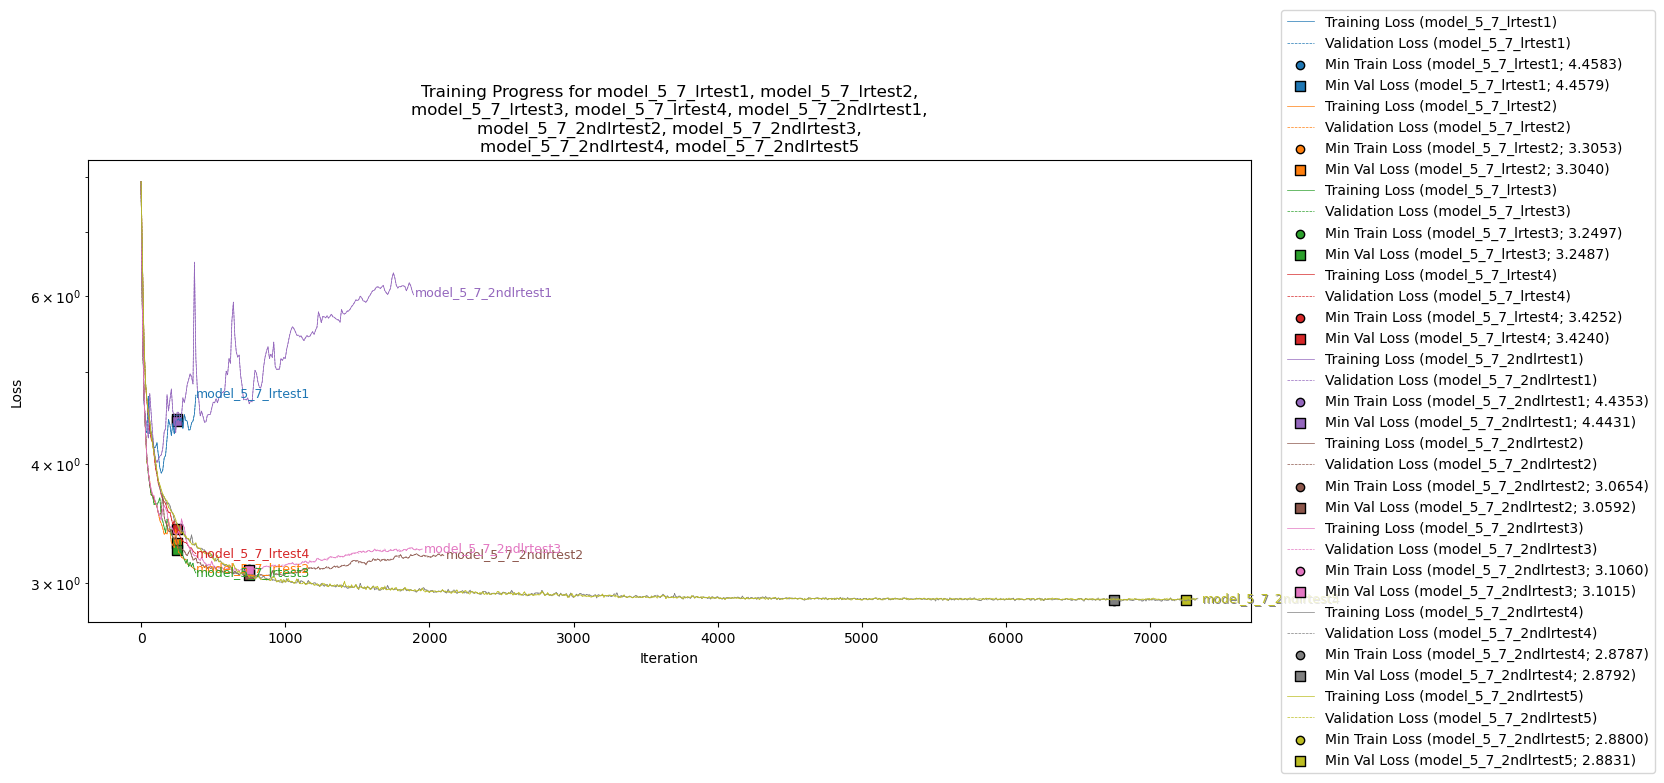

In [3]:
# Training graphs
plot_train_graphs(models_to_compare, juxtaposed=False, use_epochs=False, use_log_scale=True)